In [31]:
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import tempfile
import os
import warnings
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats

In [32]:
plt.rcParams['figure.figsize'] = (10, 5) 

In [33]:
run = wandb.init(project="predict_house_price", job_type="load_data")

artifact = run.use_artifact('raw_data_csv:latest', type='raw_data')

artifact_dir = artifact.download()

file_path = os.path.join(artifact_dir, "raw_data.csv")

train = pd.read_csv(file_path)

run.finish()
train.info()


wandb:   1 of 1 files downloaded.  
wandb: ERROR The nbformat package was not found. It is required to save notebook history.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [34]:
#ProfileReport(train, title='kun', explorative=True)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [36]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [37]:
#kiểm tra các giá trị null trong tập train
train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

In [38]:
# Check duplicate rows in train set
train.duplicated().sum()

np.int64(0)

In [39]:
#Điền mean của LotFrontage vào các giá trị null
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)
# thay nAn của Alley bằng 'None'
train['Alley'].fillna('None', inplace=True)
#điền giá trị cột MSZoning bằng mode của nó
train['MSZoning'].fillna(train['MSZoning'].mode()[0], inplace=True)
# điền giá trị null của MasVnrType bằng 'None'
train['MasVnrType'].fillna('None', inplace=True)
#điền gtri null của MasVnrArea bằng mean của nó
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace=True)
#điền gtri null của BsmtQual và BsmtCond bằng 'None'
train['BsmtQual'].fillna('None', inplace=True)
train['BsmtCond'].fillna('None', inplace=True)
# thay giá trị null của FireplaceQu bằng 'None'
train['FireplaceQu'].fillna('None', inplace=True)
# thay giá trị null của GarageType và GarageFinish bằng 'None'
train['GarageType'].fillna('None', inplace=True)
train['GarageFinish'].fillna('None', inplace=True)
# thay giá trị null của GarageYrBlt bằng None 
train['GarageYrBlt'].fillna('None', inplace=True)
# thay giá trị null của GarageQual và GarageCond bằng 'None'
train['GarageQual'].fillna('None', inplace=True)    
train['GarageCond'].fillna('None', inplace=True)  
# thay giá trị null của electrical bằng mode 
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)
# thay giá trị null của BsmtExposure, BsmtFinType1 và BsmtFinType2 bằng 'None'
train['BsmtExposure'].fillna('None', inplace=True)
train['BsmtFinType1'].fillna('None', inplace=True)
train['BsmtFinType2'].fillna('None', inplace=True)
# thay giá trị null của PoolQC bằng 'None'
train['PoolQC'].fillna('None', inplace=True)
# thay giá trị null của Fence bằng 'None'
train['Fence'].fillna('None', inplace=True)
# thay giá trị null của MiscFeature  bằng 'None'
train['MiscFeature'].fillna('None', inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_43128\2786221905.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_43128\2786221905.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [40]:
def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

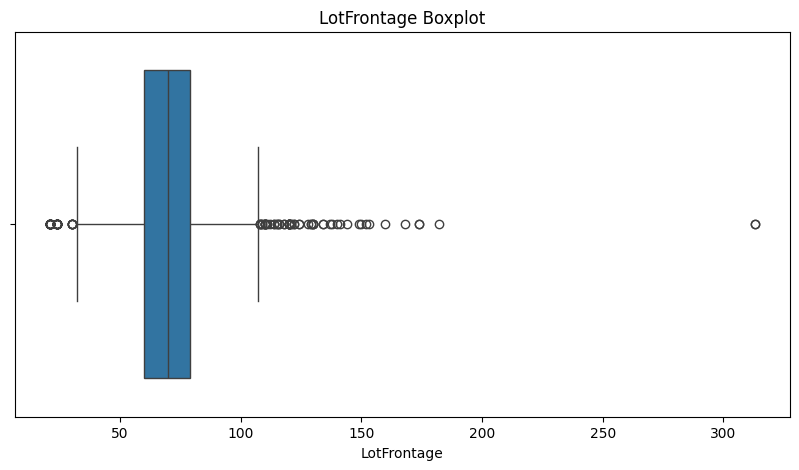

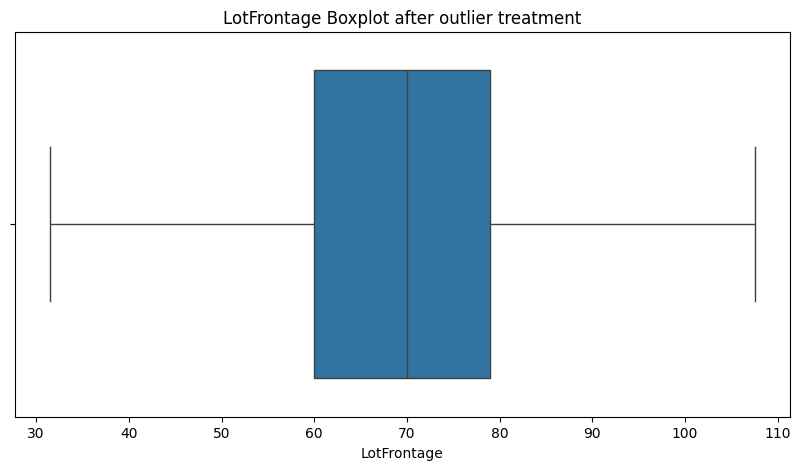

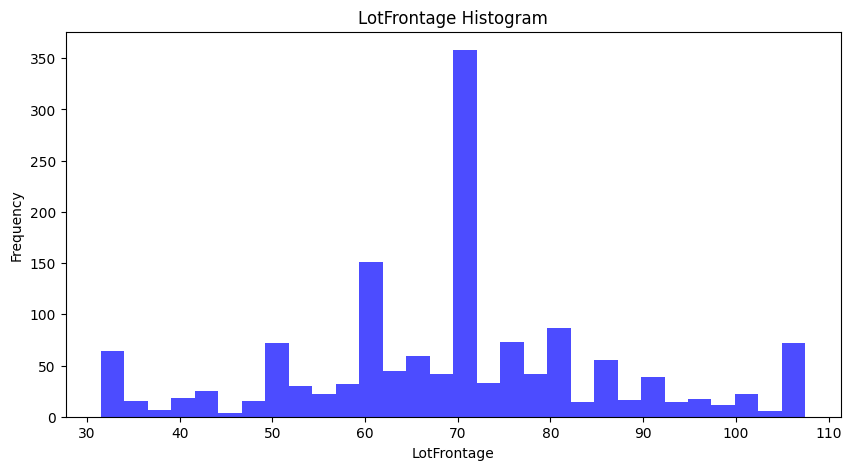

In [41]:
# LotFrontage
# vẽ boxplot LotFrontage
plt.figure(figsize=(10, 5))
sns.boxplot(x=train['LotFrontage'])
plt.title('LotFrontage Boxplot')
plt.show()
# xử lý outlier 
lotfrontage = BoxplotOutlierClipper(whisker_coeff=1.5)
lotfrontage.fit(train['LotFrontage'])
train['LotFrontage'] = lotfrontage.transform(train['LotFrontage'])
# vẽ lại boxplot sau khi xử lý outlier
plt.figure(figsize=(10, 5))
sns.boxplot(x=train['LotFrontage'])
plt.title('LotFrontage Boxplot after outlier treatment')
plt.show()
# vẽ histogram LotFrontage
plt.figure(figsize=(10, 5))
plt.hist(train['LotFrontage'], bins=30, color='blue', alpha=0.7)
plt.title('LotFrontage Histogram')
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.show()

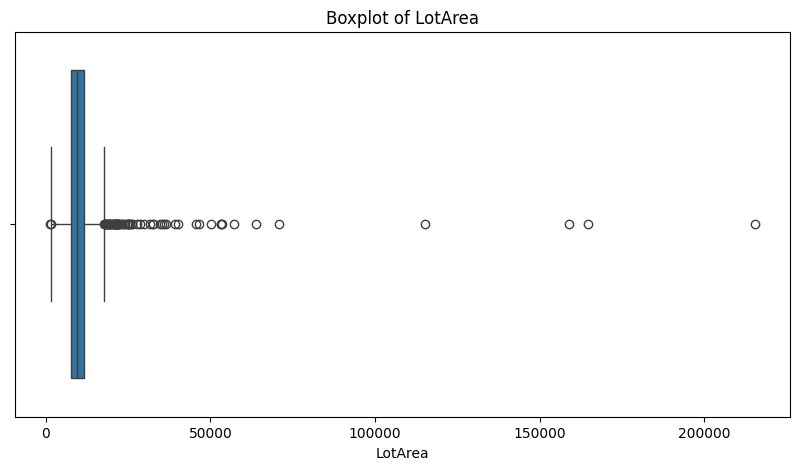

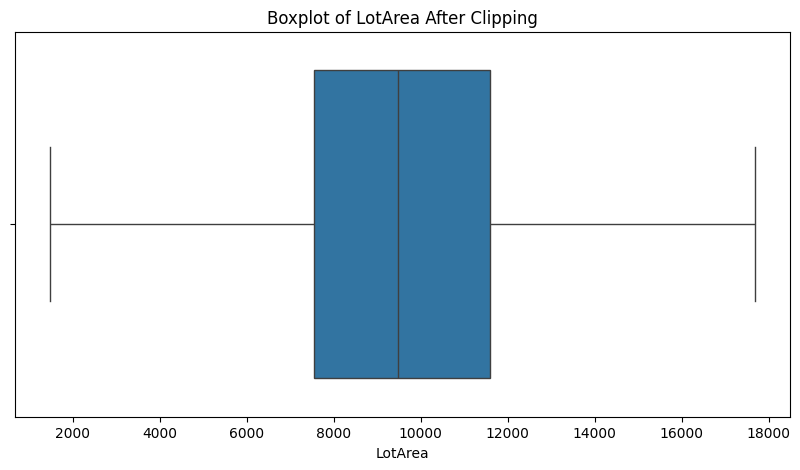

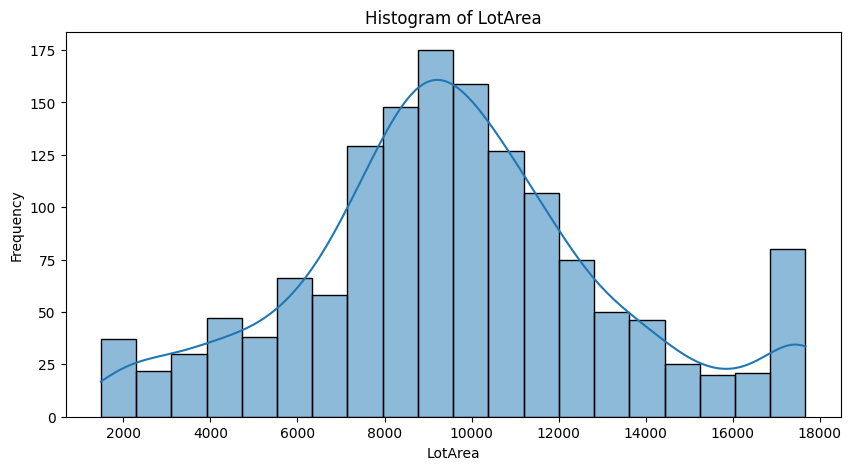

In [42]:
# LotArea          
# vẽ boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=train, x='LotArea')
plt.title('Boxplot of LotArea')
plt.xlabel('LotArea')
plt.show()
clipper = BoxplotOutlierClipper(whisker_coeff=1.5)
clipper.fit(train['LotArea']) 
train['LotArea'] = clipper.transform(train['LotArea'])
# vẽ lại boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=train, x='LotArea')
plt.title('Boxplot of LotArea After Clipping')
plt.xlabel('LotArea')
plt.show()
# vẽ histogram LotArea
plt.figure(figsize=(10, 5))
sns.histplot(data=train, x='LotArea', bins=20, kde=True)
plt.title('Histogram of LotArea')
plt.xlabel('LotArea') 
plt.ylabel('Frequency')
plt.show() 

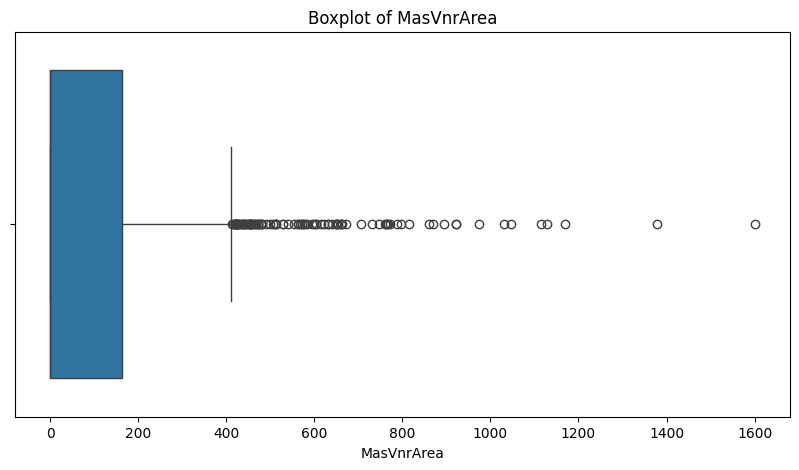

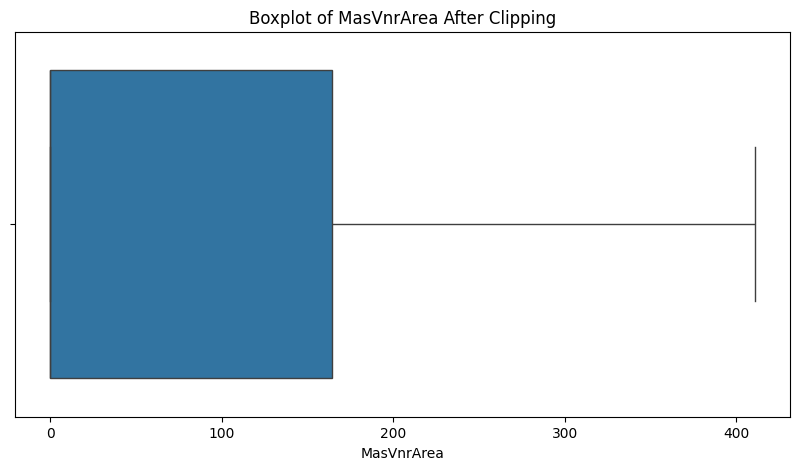

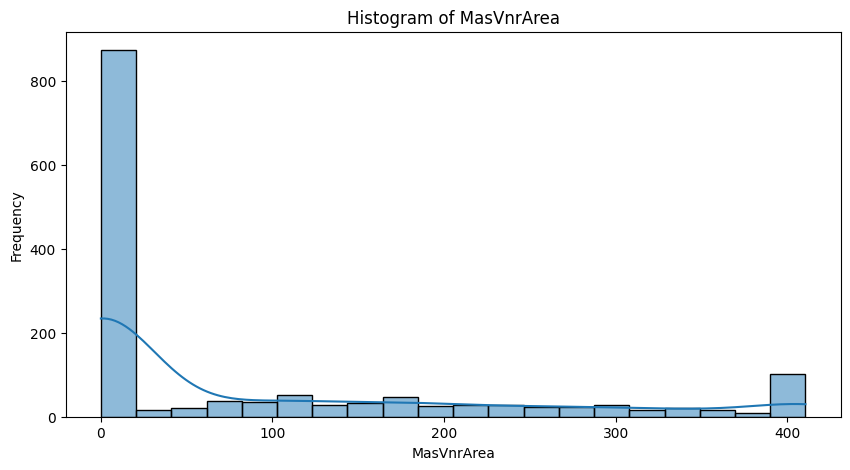

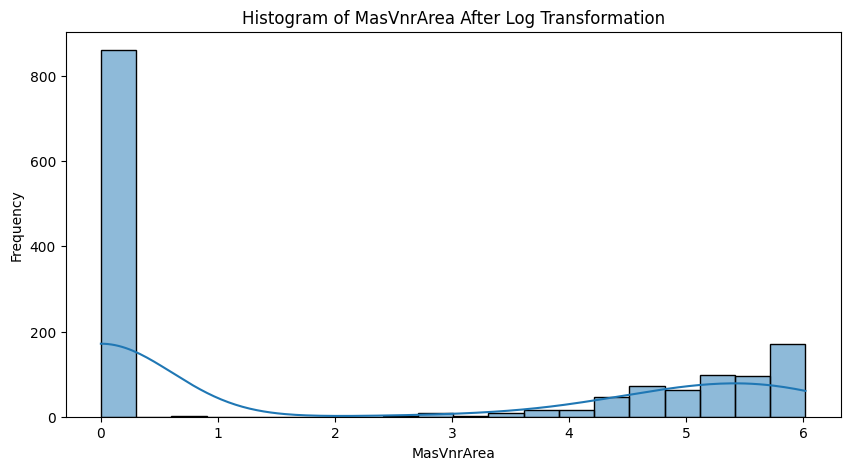

In [43]:
# MasVnrArea 
# vẽ boxplot 
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x = 'MasVnrArea' )
plt.title('Boxplot of MasVnrArea')
plt.xlabel('MasVnrArea')
plt.show()
# xử lý outlier
clipper.fit(train['MasVnrArea'])
train['MasVnrArea'] = clipper.transform(train['MasVnrArea'])
# vẽ lại boxplot sau khi xử lý outlier
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x = 'MasVnrArea' )
plt.title('Boxplot of MasVnrArea After Clipping')
plt.xlabel('MasVnrArea')
plt.show()
# vẽ histogram 
plt.figure(figsize=(10,5))
sns.histplot(data=train, x = 'MasVnrArea', bins=20, kde=True)
plt.title('Histogram of MasVnrArea')
plt.xlabel('MasVnrArea')
plt.ylabel('Frequency')
plt.show()
# giảm skew bằng loglog
train['MasVnrArea'] = np.log1p(train['MasVnrArea'])
# vẽ lại histogram sau khi giảm skew
plt.figure(figsize=(10,5))
sns.histplot(data=train, x= 'MasVnrArea', bins=20, kde=True)
plt.title('Histogram of MasVnrArea After Log Transformation')
plt.xlabel('MasVnrArea')
plt.ylabel('Frequency')
plt.show()

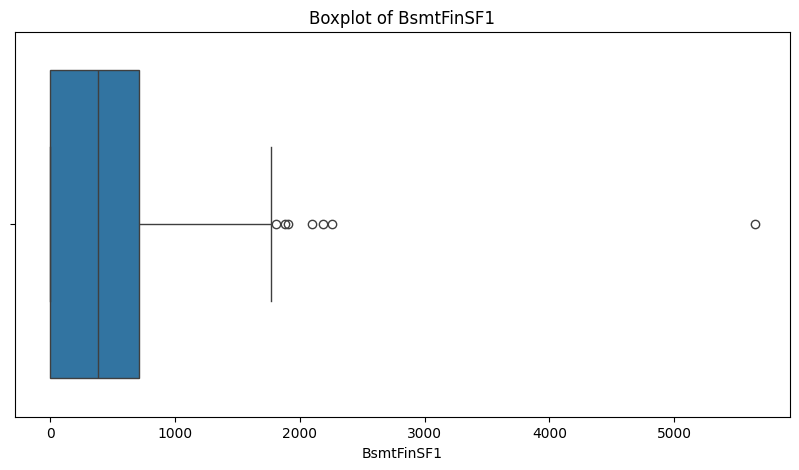

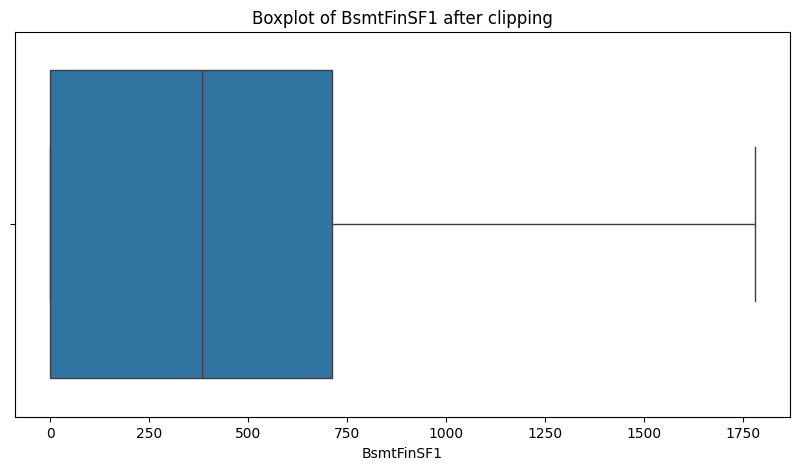

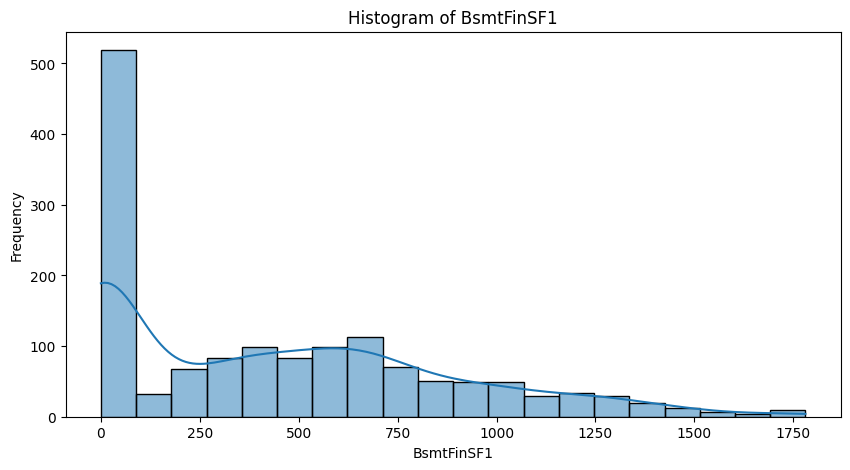

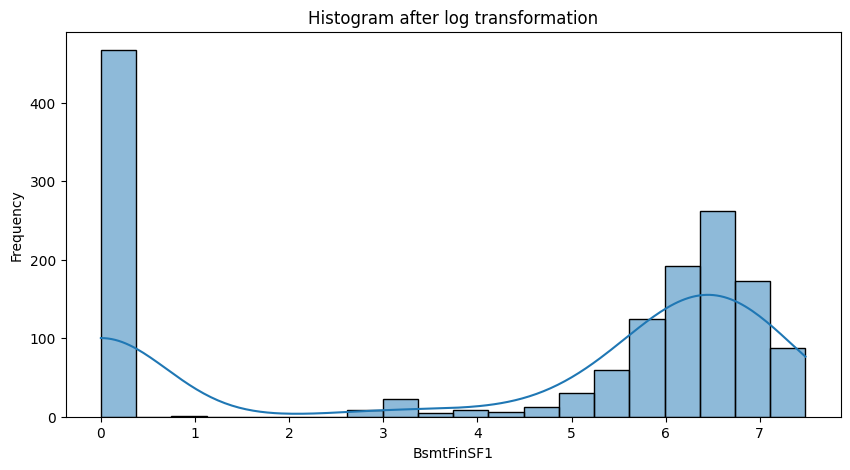

In [44]:
# BsmtFinSF1 
# vẽ boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x = 'BsmtFinSF1')
plt.title('Boxplot of BsmtFinSF1')
plt.show()
# xử lý outlier 
clipper.fit(train['BsmtFinSF1'])
train['BsmtFinSF1'] = clipper.transform(train['BsmtFinSF1'])
# vẽ lại boxplot 
sns.boxplot(data=train, x = 'BsmtFinSF1')
plt.title('Boxplot of BsmtFinSF1 after clipping')
plt.show()
# vẽ histogram 
sns.histplot(data=train, x = 'BsmtFinSF1', bins=20, kde=True)
plt.title('Histogram of BsmtFinSF1')
plt.xlabel('BsmtFinSF1')
plt.ylabel('Frequency')
plt.show()
# sửa lại skew 
train['BsmtFinSF1'] = np.log1p(train['BsmtFinSF1'])
# vẽ lại histogram 
sns.histplot(data=train, x = 'BsmtFinSF1', bins=20, kde = True)
plt.title('Histogram after log transformation')
plt.xlabel('BsmtFinSF1')
plt.ylabel('Frequency')
plt.show()


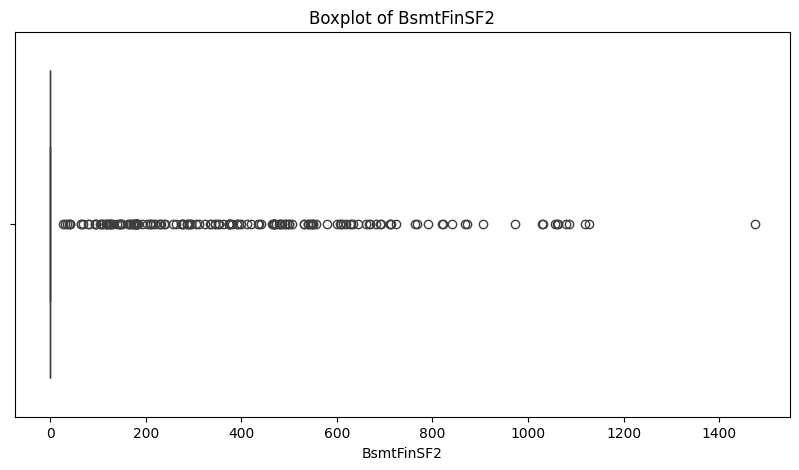

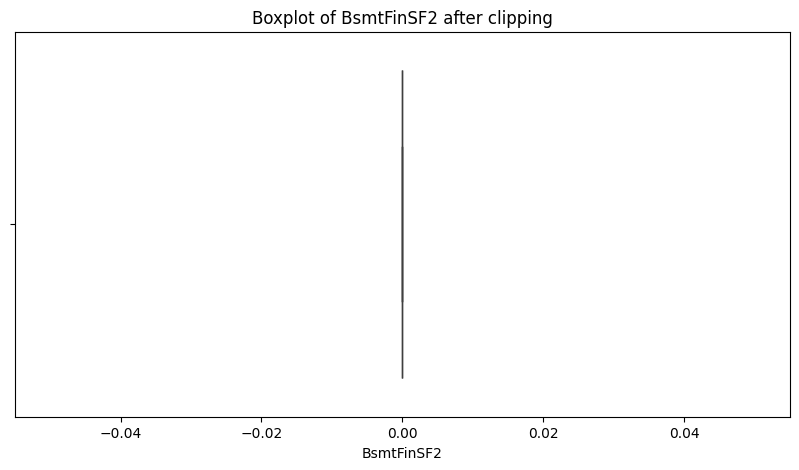

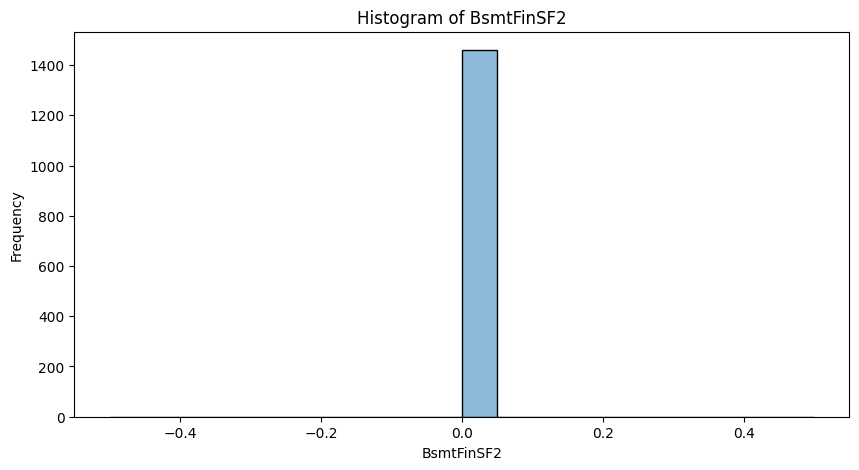

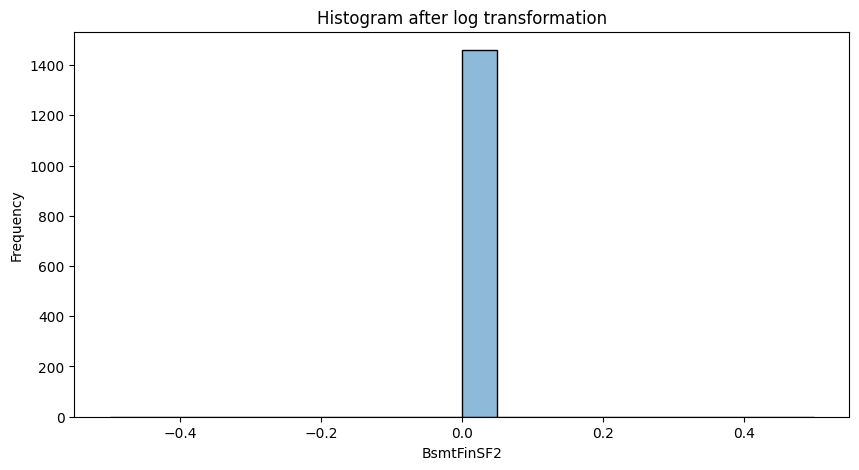

In [45]:
# BsmtFinSF2 
# vẽ boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x = 'BsmtFinSF2')
plt.title('Boxplot of BsmtFinSF2')
plt.show()

# xử lý outlier 
clipper.fit(train['BsmtFinSF2'])
train['BsmtFinSF2'] = clipper.transform(train['BsmtFinSF2'])

# vẽ lại boxplot 
sns.boxplot(data=train, x = 'BsmtFinSF2')
plt.title('Boxplot of BsmtFinSF2 after clipping')
plt.show()

# vẽ histogram 
sns.histplot(data=train, x = 'BsmtFinSF2', bins=20, kde=True)
plt.title('Histogram of BsmtFinSF2')
plt.xlabel('BsmtFinSF2')
plt.ylabel('Frequency')
plt.show()

# sửa lại skew 
train['BsmtFinSF2'] = np.log1p(train['BsmtFinSF2'])

# vẽ lại histogram 
sns.histplot(data=train, x = 'BsmtFinSF2', bins=20, kde = True)
plt.title('Histogram after log transformation')
plt.xlabel('BsmtFinSF2')
plt.ylabel('Frequency')
plt.show()
train = train.drop(columns='BsmtFinSF2')

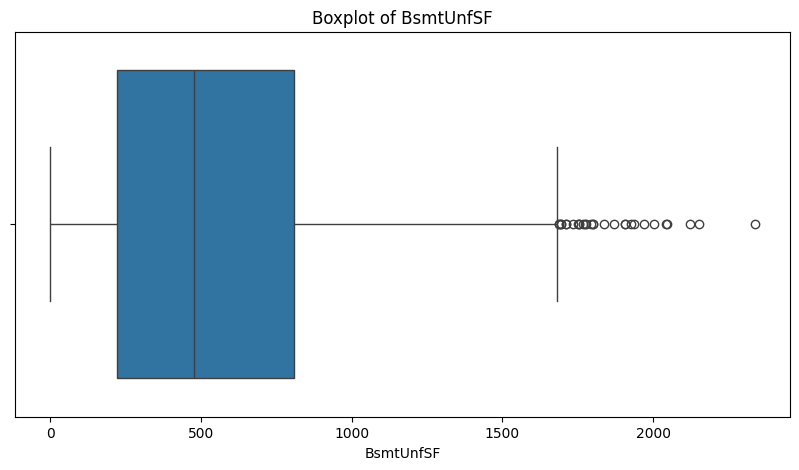

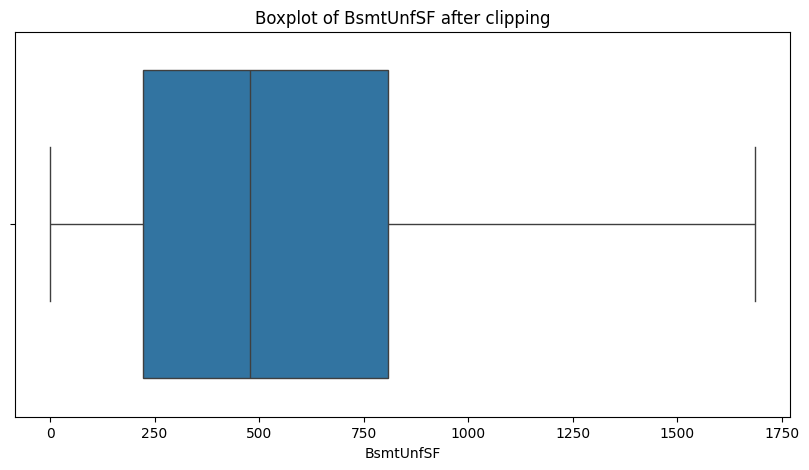

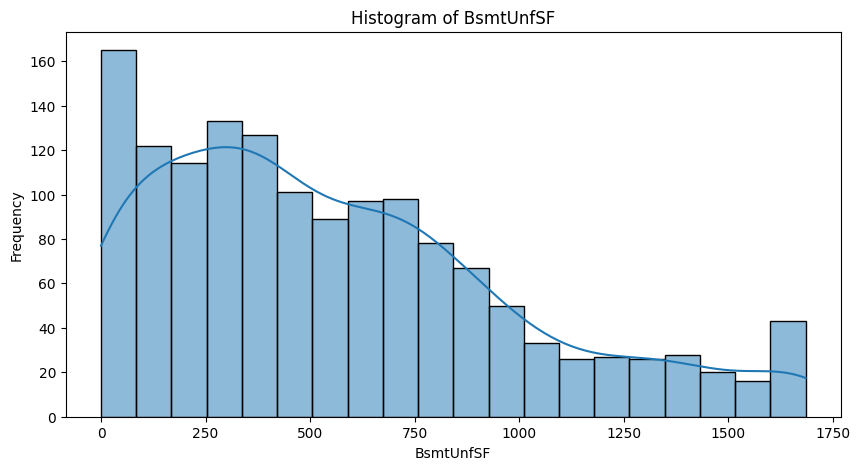

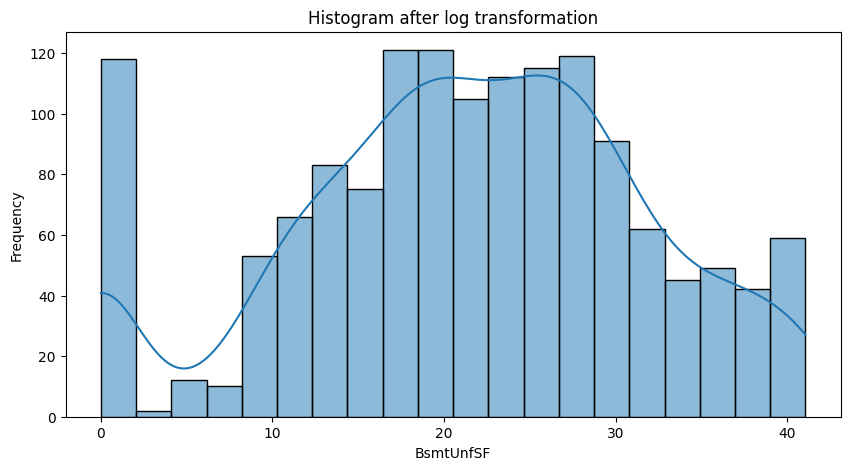

np.float64(-0.2918561851410364)

In [46]:
# BsmtUnfSF 
# vẽ boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x = 'BsmtUnfSF')
plt.title('Boxplot of BsmtUnfSF')
plt.show()

# xử lý outlier 
clipper.fit(train['BsmtUnfSF'])
train['BsmtUnfSF'] = clipper.transform(train['BsmtUnfSF'])

# vẽ lại boxplot 
sns.boxplot(data=train, x = 'BsmtUnfSF')
plt.title('Boxplot of BsmtUnfSF after clipping')
plt.show()

# vẽ histogram 
sns.histplot(data=train, x = 'BsmtUnfSF', bins=20, kde=True)
plt.title('Histogram of BsmtUnfSF')
plt.xlabel('BsmtUnfSF')
plt.ylabel('Frequency')
plt.show()

#tính skew
train['BsmtUnfSF'].skew()

# sửa lại skew 
train['BsmtUnfSF'] = np.sqrt(train['BsmtUnfSF'])

# vẽ lại histogram 
sns.histplot(data=train, x = 'BsmtUnfSF', bins=20, kde = True)
plt.title('Histogram after log transformation')
plt.xlabel('BsmtUnfSF')
plt.ylabel('Frequency')
plt.show()

# tính lại skew 
train['BsmtUnfSF'].skew()

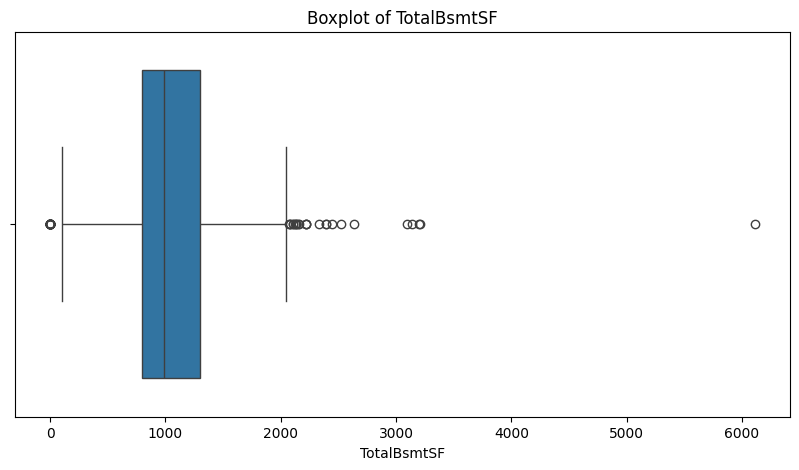

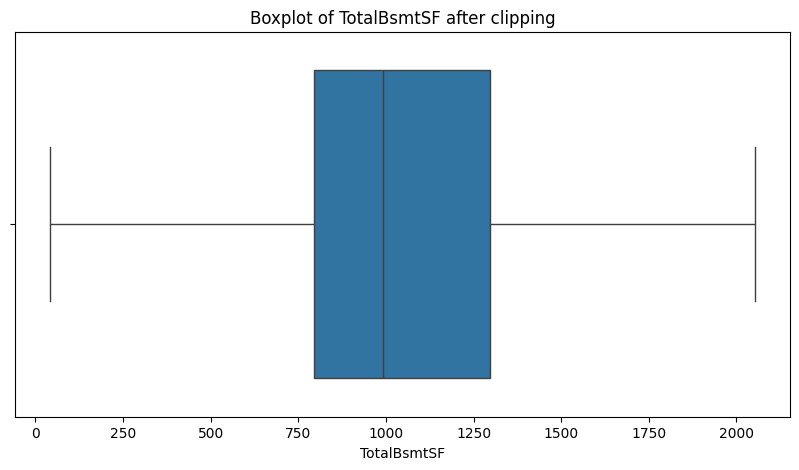

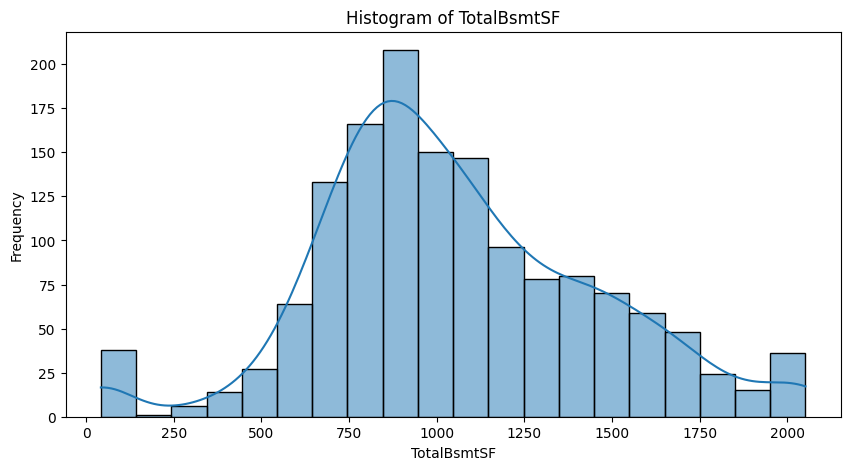

Skewness before transformation: 0.23723979387579908


In [47]:
# TotalBsmtSF 
# vẽ boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x = 'TotalBsmtSF')
plt.title('Boxplot of TotalBsmtSF')
plt.show()

# xử lý outlier 
clipper.fit(train['TotalBsmtSF'])
train['TotalBsmtSF'] = clipper.transform(train['TotalBsmtSF'])

# vẽ lại boxplot 
sns.boxplot(data=train, x = 'TotalBsmtSF')
plt.title('Boxplot of TotalBsmtSF after clipping')
plt.show()

# vẽ histogram 
sns.histplot(data=train, x = 'TotalBsmtSF', bins=20, kde=True)
plt.title('Histogram of TotalBsmtSF')
plt.xlabel('TotalBsmtSF')
plt.ylabel('Frequency')
plt.show()

# tính skew
skew_before = train['TotalBsmtSF'].skew()
print(f'Skewness before transformation: {skew_before}')


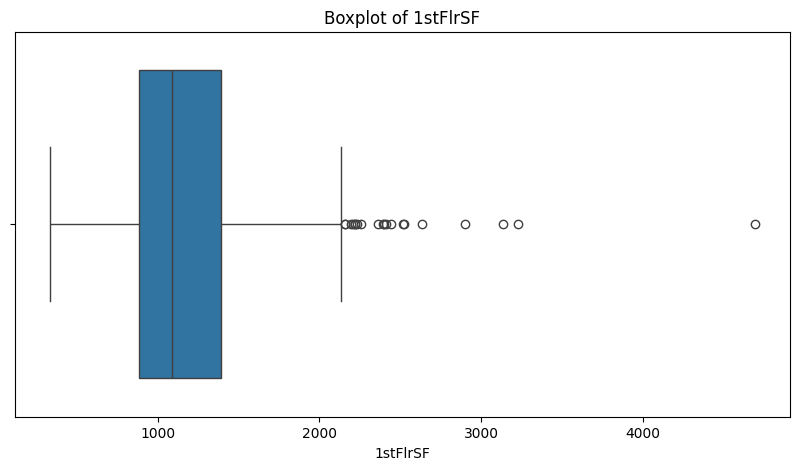

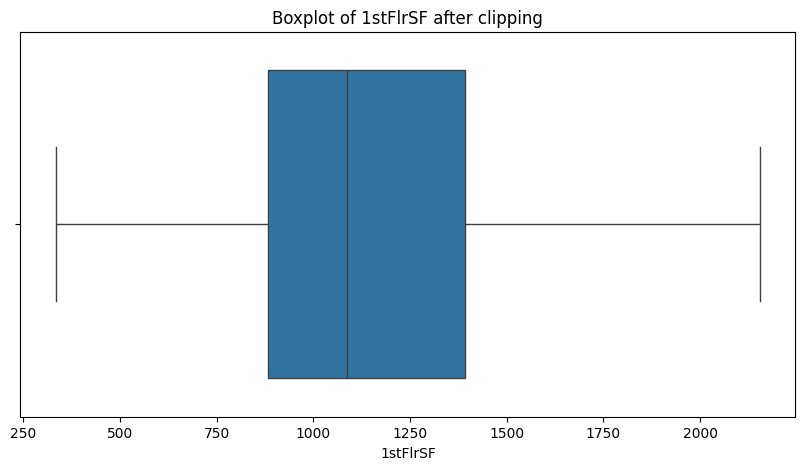

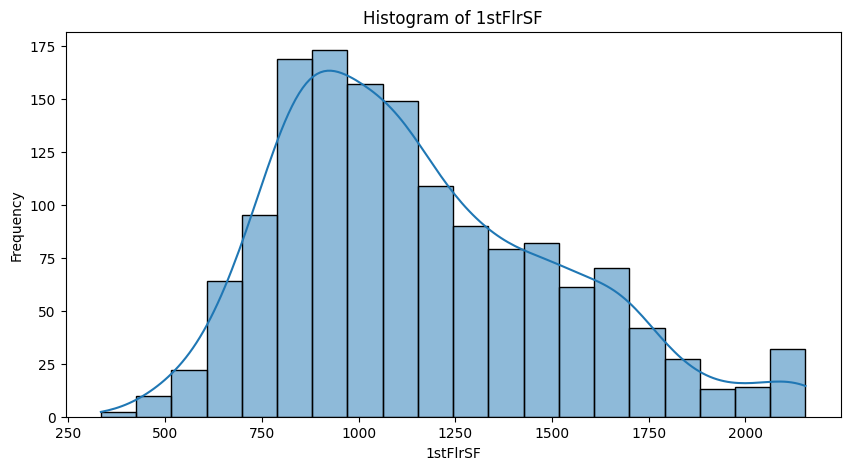

Skewness before transformation: 0.6641337448938754


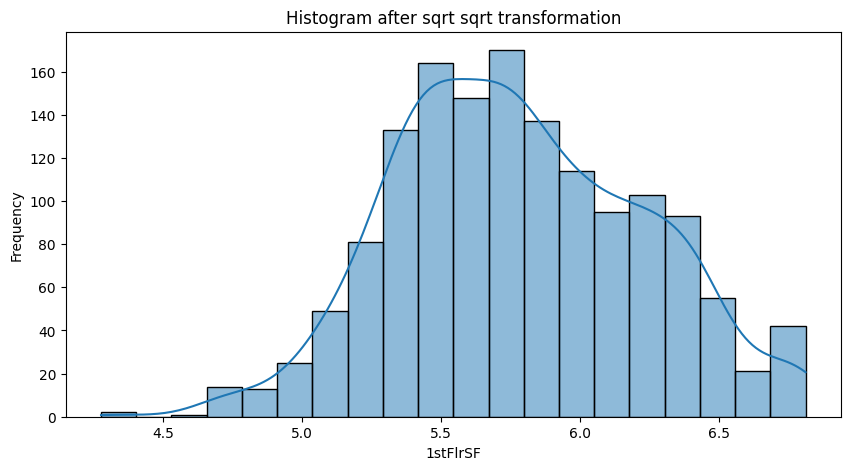

Skewness after transformation: 0.13921600652193106


In [48]:
# 1stFlrSF 
# vẽ boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x = '1stFlrSF')
plt.title('Boxplot of 1stFlrSF')
plt.show()

# xử lý outlier 
clipper.fit(train['1stFlrSF'])
train['1stFlrSF'] = clipper.transform(train['1stFlrSF'])

# vẽ lại boxplot 
sns.boxplot(data=train, x = '1stFlrSF')
plt.title('Boxplot of 1stFlrSF after clipping')
plt.show()

# vẽ histogram 
sns.histplot(data=train, x = '1stFlrSF', bins=20, kde=True)
plt.title('Histogram of 1stFlrSF')
plt.xlabel('1stFlrSF')
plt.ylabel('Frequency')
plt.show()

# tính skew
skew_before = train['1stFlrSF'].skew()
print(f'Skewness before transformation: {skew_before}')

# sửa lại skew (dùng căn bậc 4)
train['1stFlrSF'] = np.sqrt(np.sqrt(train['1stFlrSF']))

# vẽ lại histogram 
sns.histplot(data=train, x = '1stFlrSF', bins=20, kde = True)
plt.title('Histogram after sqrt sqrt transformation')
plt.xlabel('1stFlrSF')
plt.ylabel('Frequency')
plt.show()

# tính lại skew 
skew_after = train['1stFlrSF'].skew()
print(f'Skewness after transformation: {skew_after}')


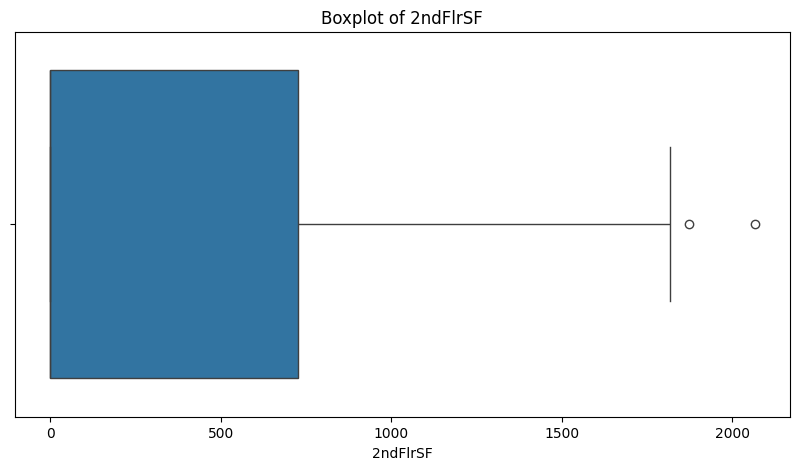

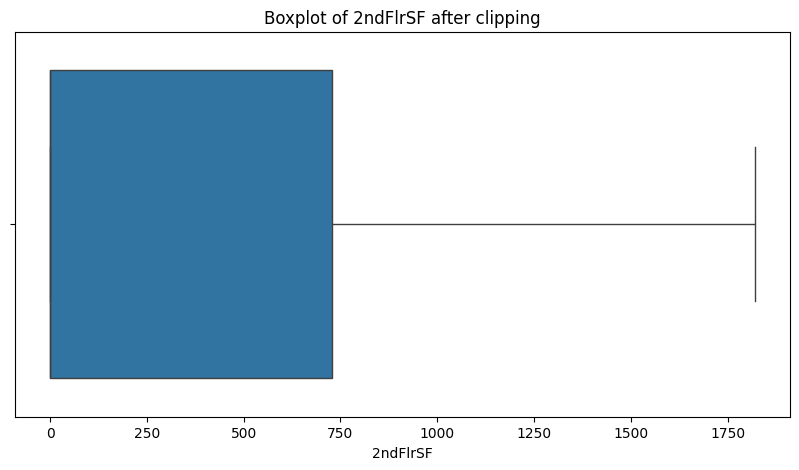

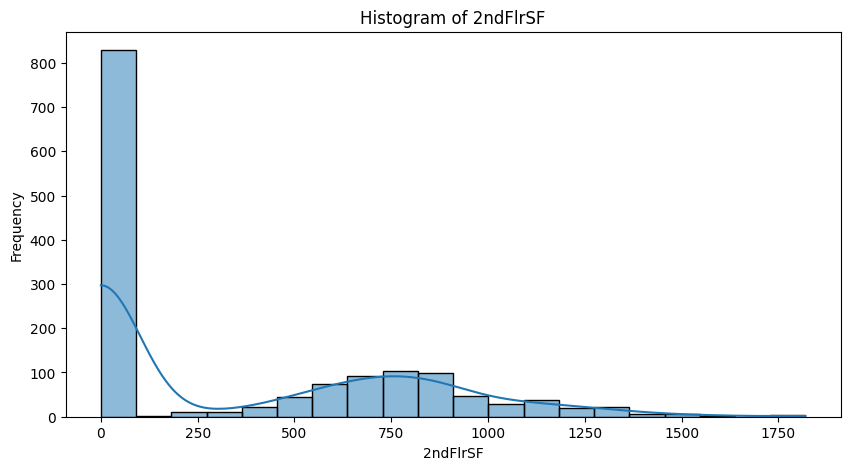

Skewness before transformation: 0.8001089596914173


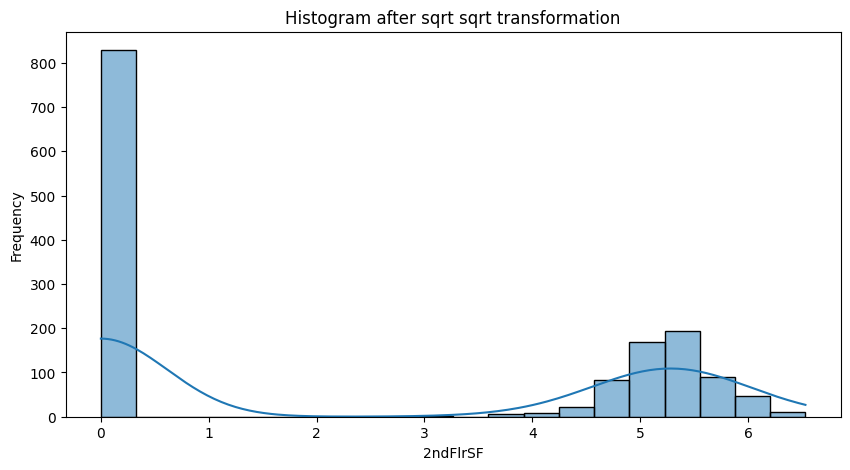

Skewness after transformation: 0.31387765728325573


In [49]:
# 2ndFlrSF 
# vẽ boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x = '2ndFlrSF')
plt.title('Boxplot of 2ndFlrSF')
plt.show()

# xử lý outlier 
clipper.fit(train['2ndFlrSF'])
train['2ndFlrSF'] = clipper.transform(train['2ndFlrSF'])

# vẽ lại boxplot 
sns.boxplot(data=train, x = '2ndFlrSF')
plt.title('Boxplot of 2ndFlrSF after clipping')
plt.show()

# vẽ histogram 
sns.histplot(data=train, x = '2ndFlrSF', bins=20, kde=True)
plt.title('Histogram of 2ndFlrSF')
plt.xlabel('2ndFlrSF')
plt.ylabel('Frequency')
plt.show()

# tính skew
skew_before = train['2ndFlrSF'].skew()
print(f'Skewness before transformation: {skew_before}')

# sửa lại skew (dùng căn bậc 4)
train['2ndFlrSF'] = np.sqrt(np.sqrt(train['2ndFlrSF']))

# vẽ lại histogram 
sns.histplot(data=train, x = '2ndFlrSF', bins=20, kde = True)
plt.title('Histogram after sqrt sqrt transformation')
plt.xlabel('2ndFlrSF')
plt.ylabel('Frequency')
plt.show()

# tính lại skew 
skew_after = train['2ndFlrSF'].skew()
print(f'Skewness after transformation: {skew_after}')


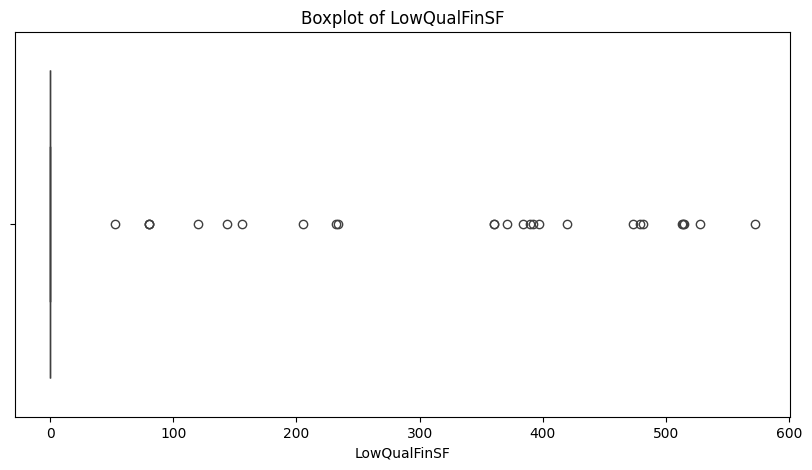

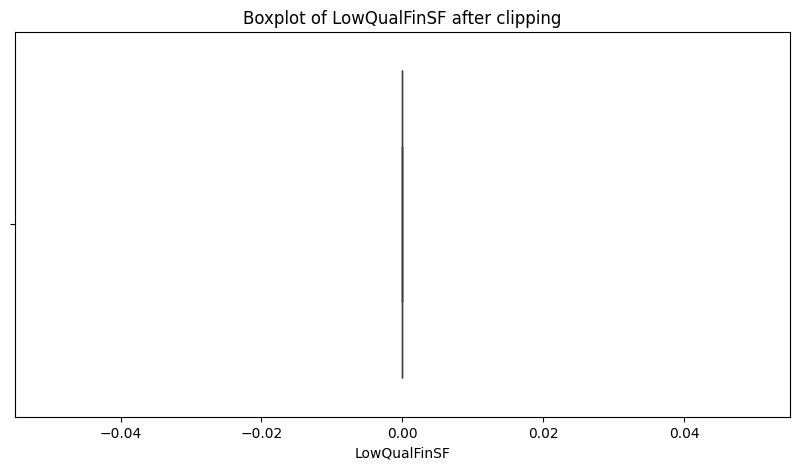

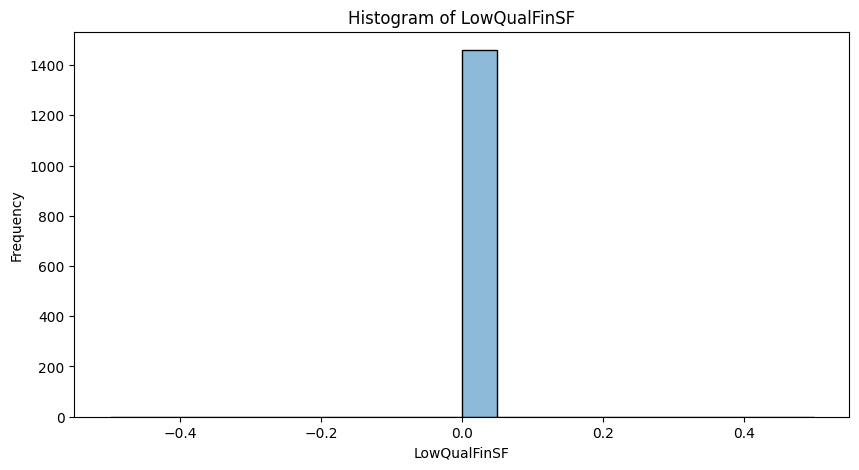

Skewness before transformation: 0.0


In [50]:
# LowQualFinSF 
# vẽ boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x = 'LowQualFinSF')
plt.title('Boxplot of LowQualFinSF')
plt.show()

# xử lý outlier 
clipper.fit(train['LowQualFinSF'])
train['LowQualFinSF'] = clipper.transform(train['LowQualFinSF'])

# vẽ lại boxplot 
sns.boxplot(data=train, x = 'LowQualFinSF')
plt.title('Boxplot of LowQualFinSF after clipping')
plt.show()

# vẽ histogram 
sns.histplot(data=train, x = 'LowQualFinSF', bins=20, kde=True)
plt.title('Histogram of LowQualFinSF')
plt.xlabel('LowQualFinSF')
plt.ylabel('Frequency')
plt.show()

# tính skew
skew_before = train['LowQualFinSF'].skew()
print(f'Skewness before transformation: {skew_before}')

train = train.drop(columns='LowQualFinSF')


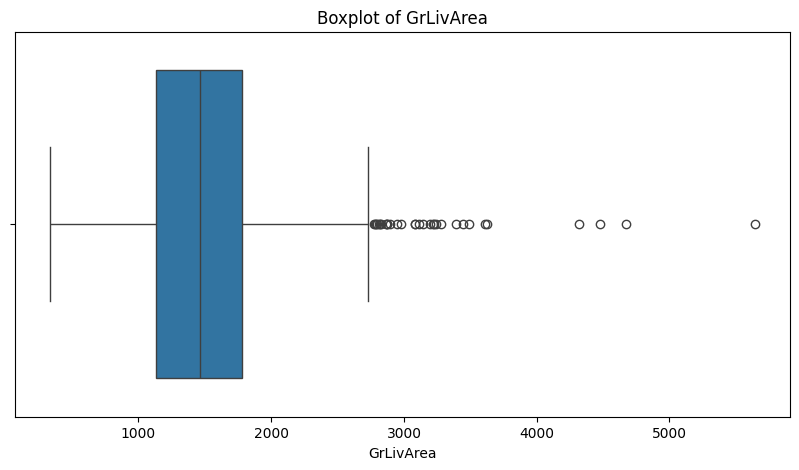

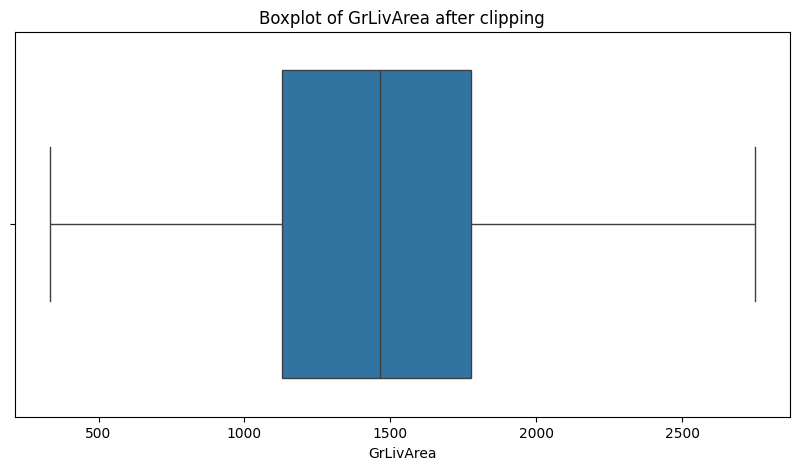

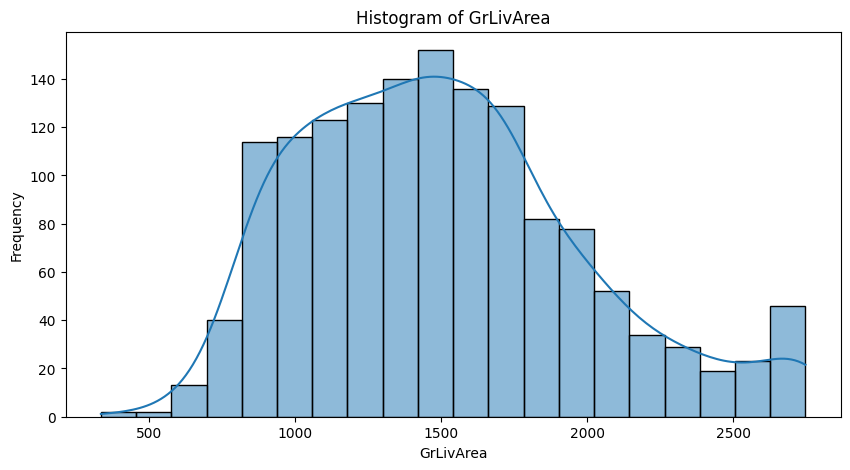

Skewness before transformation: 0.5935558345342846


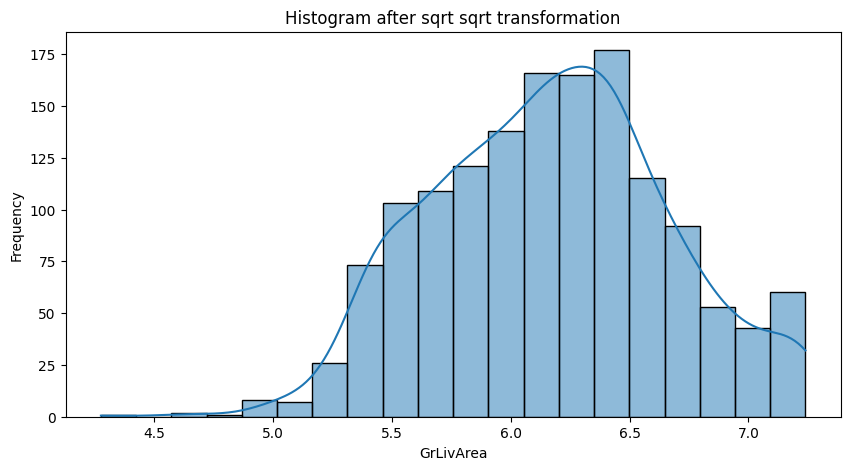

Skewness after transformation: 0.01912805381804591


In [51]:
# GrLivArea 
# vẽ boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x = 'GrLivArea')
plt.title('Boxplot of GrLivArea')
plt.show()

# xử lý outlier 
clipper.fit(train['GrLivArea'])
train['GrLivArea'] = clipper.transform(train['GrLivArea'])

# vẽ lại boxplot 
sns.boxplot(data=train, x = 'GrLivArea')
plt.title('Boxplot of GrLivArea after clipping')
plt.show()

# vẽ histogram 
sns.histplot(data=train, x = 'GrLivArea', bins=20, kde=True)
plt.title('Histogram of GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

# tính skew
skew_before = train['GrLivArea'].skew()
print(f'Skewness before transformation: {skew_before}')

# sửa lại skew (dùng căn bậc 4)
train['GrLivArea'] = np.sqrt(np.sqrt(train['GrLivArea']))

# vẽ lại histogram 
sns.histplot(data=train, x = 'GrLivArea', bins=20, kde = True)
plt.title('Histogram after sqrt sqrt transformation')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

# tính lại skew 
skew_after = train['GrLivArea'].skew()
print(f'Skewness after transformation: {skew_after}')


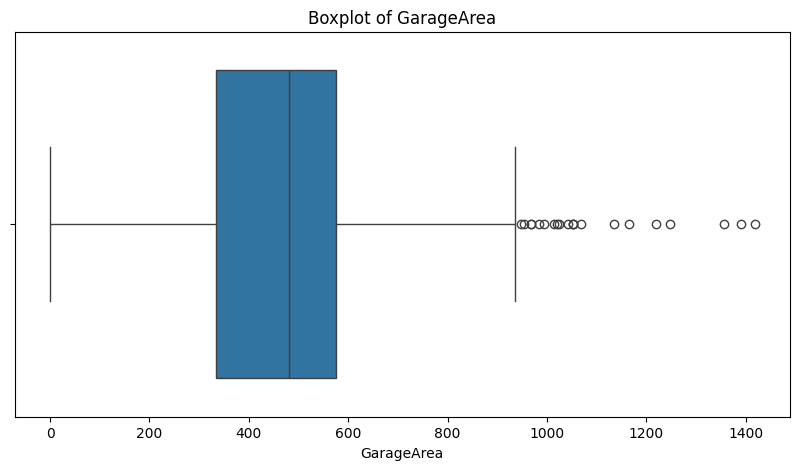

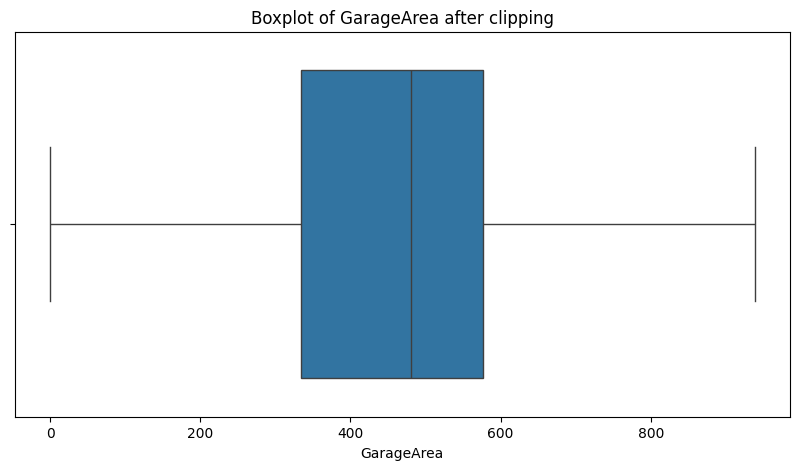

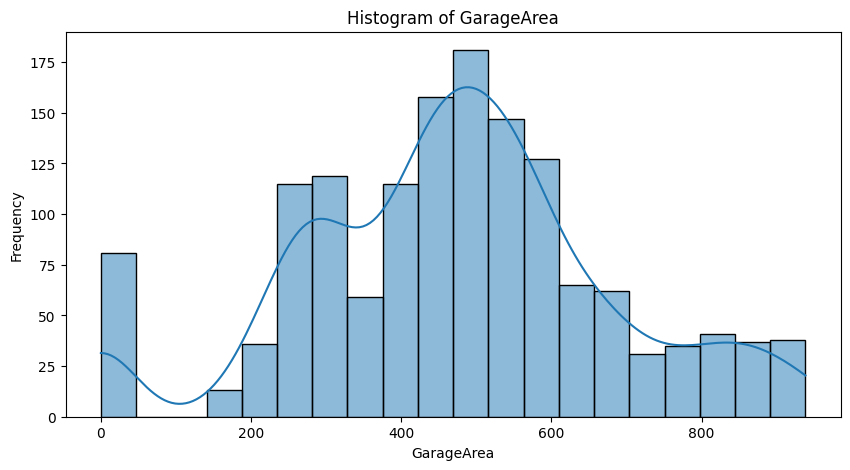

Skewness before transformation: -0.06968525984001042


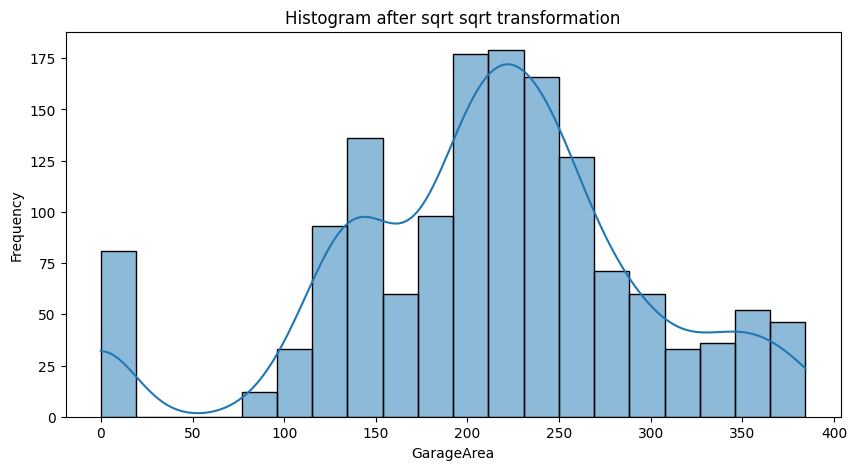

Skewness after transformation: -0.42242924247465463


In [52]:
# 60. GarageArea 
# vẽ boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x = 'GarageArea')
plt.title('Boxplot of GarageArea')
plt.show()

# xử lý outlier 
clipper.fit(train['GarageArea'])
train['GarageArea'] = clipper.transform(train['GarageArea'])

# vẽ lại boxplot 
sns.boxplot(data=train, x = 'GarageArea')
plt.title('Boxplot of GarageArea after clipping')
plt.show()

# vẽ histogram 
sns.histplot(data=train, x = 'GarageArea', bins=20, kde=True)
plt.title('Histogram of GarageArea')
plt.xlabel('GarageArea')
plt.ylabel('Frequency')
plt.show()

# tính skew
skew_before = train['GarageArea'].skew()
print(f'Skewness before transformation: {skew_before}')

# sửa lại skew 
train['GarageArea'], lambda_value = stats.boxcox(train['GarageArea'] + 1)

# vẽ lại histogram 
sns.histplot(data=train, x = 'GarageArea', bins=20, kde = True)
plt.title('Histogram after sqrt sqrt transformation')
plt.xlabel('GarageArea')
plt.ylabel('Frequency')
plt.show()

# tính lại skew 
skew_after = train['GarageArea'].skew()
print(f'Skewness after transformation: {skew_after}')


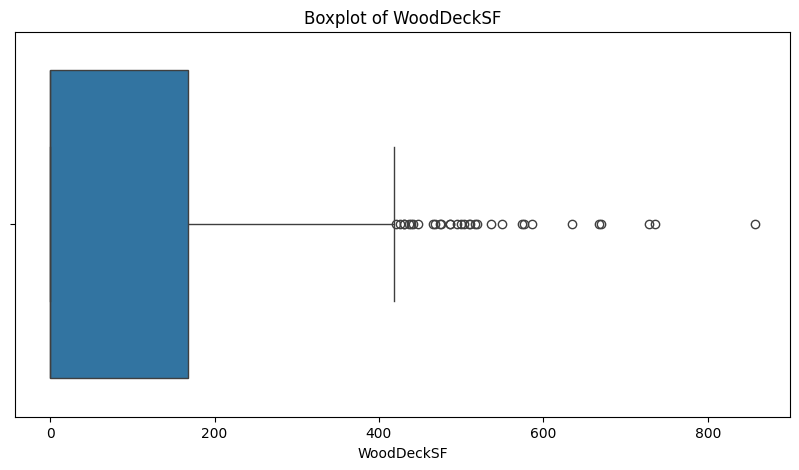

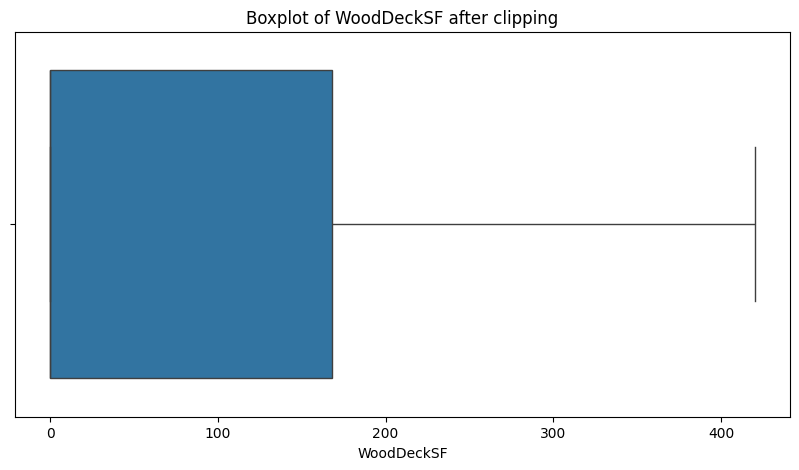

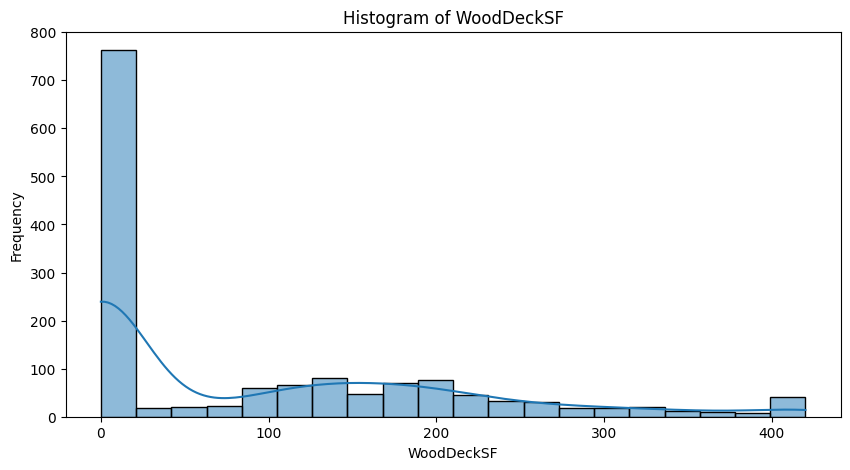

Skewness before transformation: 1.0836730926474039


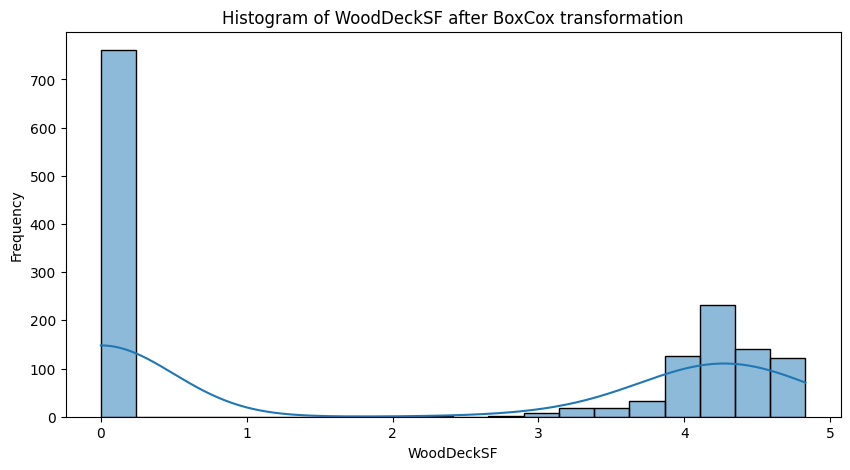

Skewness after transformation: 0.12970175149398672


In [53]:
# 64. WoodDeckSF 
# vẽ boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x = 'WoodDeckSF')
plt.title('Boxplot of WoodDeckSF')
plt.show()

# xử lý outlier 
clipper.fit(train['WoodDeckSF'])
train['WoodDeckSF'] = clipper.transform(train['WoodDeckSF'])

# vẽ lại boxplot 
sns.boxplot(data=train, x = 'WoodDeckSF')
plt.title('Boxplot of WoodDeckSF after clipping')
plt.show()

# vẽ histogram 
sns.histplot(data=train, x = 'WoodDeckSF', bins=20, kde=True)
plt.title('Histogram of WoodDeckSF')
plt.xlabel('WoodDeckSF')
plt.ylabel('Frequency')
plt.show()

# tính skew
skew_before = train['WoodDeckSF'].skew()
print(f'Skewness before transformation: {skew_before}')

# sửa lại skew bằng BoxCox
train['WoodDeckSF'], lambda_value = stats.boxcox(train['WoodDeckSF'] + 1)

# vẽ lại histogram 
sns.histplot(data=train, x = 'WoodDeckSF', bins=20, kde=True)
plt.title('Histogram of WoodDeckSF after BoxCox transformation')
plt.xlabel('WoodDeckSF')
plt.ylabel('Frequency')
plt.show()

# tính lại skew
skew_after = train['WoodDeckSF'].skew()
print(f'Skewness after transformation: {skew_after}')


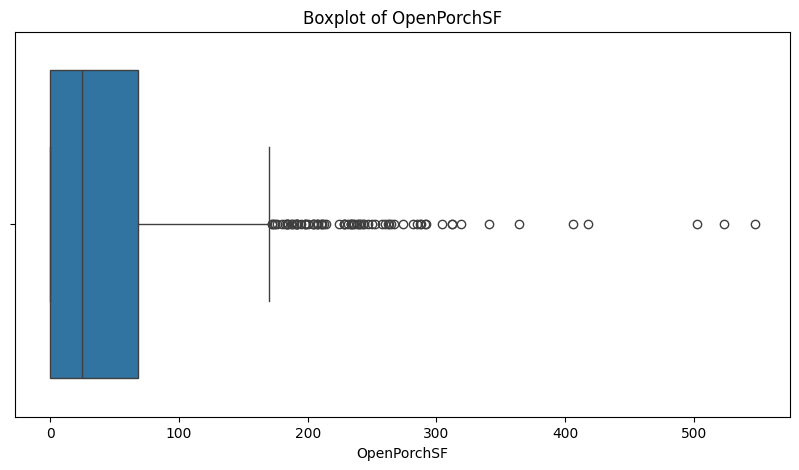

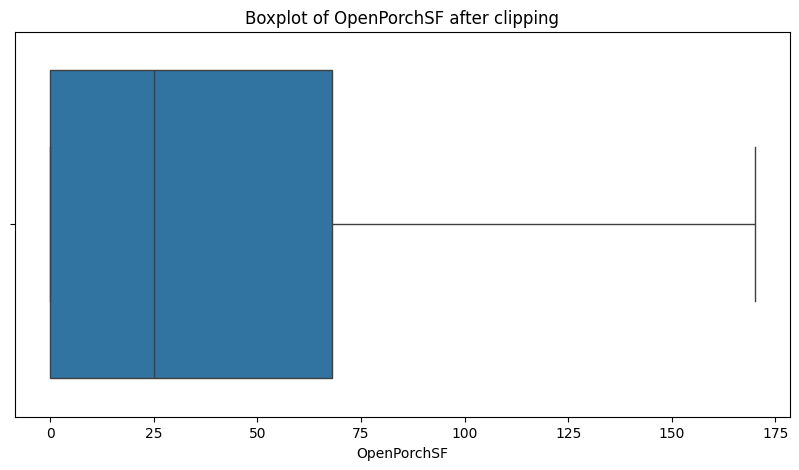

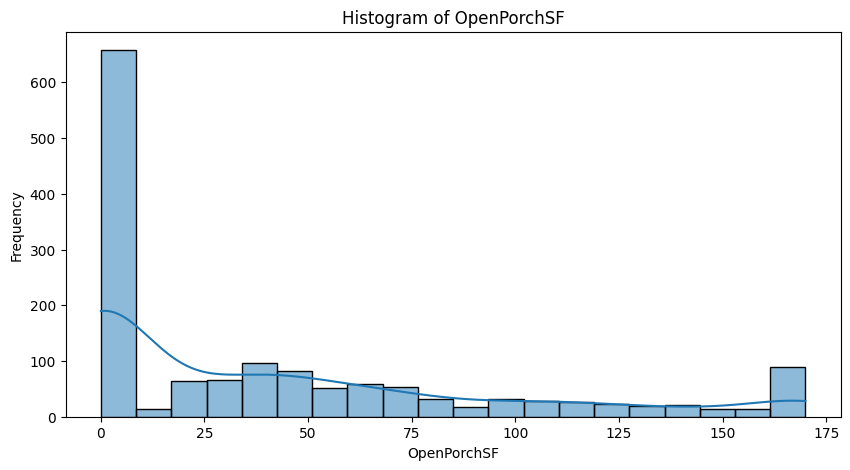

Skewness before transformation: 1.1363011278690092


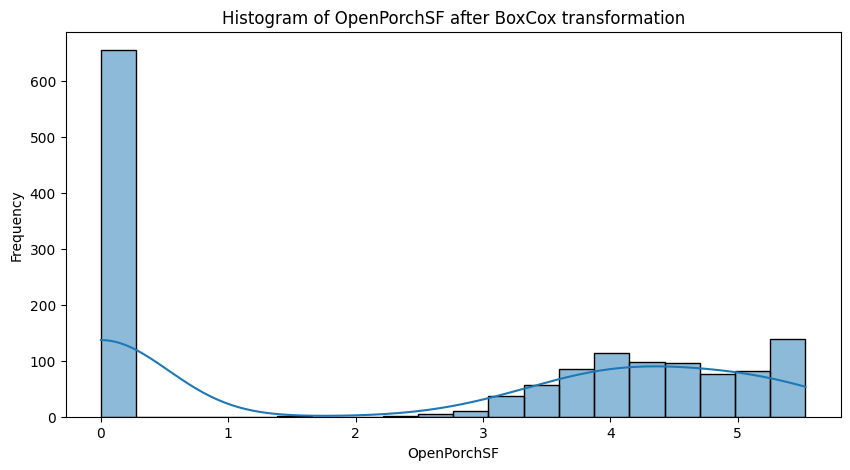

Skewness after transformation: -0.0361227109401781


In [54]:
# 65. OpenPorchSF 
# vẽ boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=train, x = 'OpenPorchSF')
plt.title('Boxplot of OpenPorchSF')
plt.show()

# xử lý outlier 
clipper.fit(train['OpenPorchSF'])
train['OpenPorchSF'] = clipper.transform(train['OpenPorchSF'])

# vẽ lại boxplot 
sns.boxplot(data=train, x = 'OpenPorchSF')
plt.title('Boxplot of OpenPorchSF after clipping')
plt.show()

# vẽ histogram 
sns.histplot(data=train, x = 'OpenPorchSF', bins=20, kde=True)
plt.title('Histogram of OpenPorchSF')
plt.xlabel('OpenPorchSF')
plt.ylabel('Frequency')
plt.show()

# tính skew
skew_before = train['OpenPorchSF'].skew()
print(f'Skewness before transformation: {skew_before}')

# sửa lại skew bằng BoxCox
train['OpenPorchSF'], lambda_value = stats.boxcox(train['OpenPorchSF'] + 1)

# vẽ lại histogram 
sns.histplot(data=train, x = 'OpenPorchSF', bins=20, kde=True)
plt.title('Histogram of OpenPorchSF after BoxCox transformation')
plt.xlabel('OpenPorchSF')
plt.ylabel('Frequency')
plt.show()

# tính lại skew
skew_after = train['OpenPorchSF'].skew()
print(f'Skewness after transformation: {skew_after}')


In [55]:
train = train.drop(columns='EnclosedPorch')
train = train.drop(columns='3SsnPorch')
train = train.drop(columns='ScreenPorch')
train = train.drop(columns='PoolArea')
train = train.drop(columns='MiscVal')

In [56]:
train['BsmtFullBath'] = train['BsmtFullBath'].astype(str)
train['BsmtHalfBath'] = train['BsmtHalfBath'].astype(str)
train['FullBath'] = train['FullBath'].astype(str)
train['HalfBath'] = train['HalfBath'].astype(str)
train['BedroomAbvGr'] = train['BedroomAbvGr'].astype(str)
train['KitchenAbvGr'] = train['KitchenAbvGr'].astype(str)
train['TotRmsAbvGrd'] = train['TotRmsAbvGrd'].astype(str)
train['Fireplaces'] = train['Fireplaces'].astype(str)
train['GarageYrBlt'] = train['GarageYrBlt'].astype(str)
train['GarageCars'] = train['GarageCars'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)

In [57]:
#ProfileReport(train, title='kun', explorative=True)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [59]:
train.to_csv("clean_data.csv", index=True) 

run = wandb.init(project="predict_house_price", job_type="upload_clean_data")

artifact = wandb.Artifact(
    name="clean_data_csv",
    type="processed_data",
    description="Housing price clean data"
)

artifact.add_file("clean_data.csv")

run.log_artifact(artifact)
run.finish()

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


In [60]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.000000,4.376132,None,None,None,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,4.612995,0.000000,None,None,None,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.000000,3.967279,None,None,None,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.000000,3.770270,None,None,None,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,4.326083,4.732047,None,None,None,12,2008,WD,Normal,250000


In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC